In [2]:
import time

import torch
from torch import nn
from d2l import torch as d2l

In [10]:
net = nn.Sequential(
    # 这里使用一个11*11的更大窗口来捕捉对象。
    # 同时，步幅为4，以减少输出的高度和宽度
    # 另外，输出通道的数据远大于LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),  # (224-11+4+2)/4 = 54
    nn.MaxPool2d(kernel_size=3, stride=2),  # (54-3+2)/2 = 26
    # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(), # 26 - 5 + 4 +1 = 26
    nn.MaxPool2d(kernel_size=3, stride=2),  # (26 - 3 + 2)/2 = 12
    # 使用三个连续的卷积层和较小的卷积窗口
    # 除了最后的卷积层，输出通道的数量进一步增加
    # 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),  # 12 - 3 + 2 + 1
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),  # 12 - 3 + 2 + 1
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),  # 12 - 3 + 2 + 1
    nn.MaxPool2d(kernel_size=3, stride=2),                     # (12 - 3 + 2) / 2 = 5
    nn.Flatten(),# 1 * 256* 2 * 5
    # 这里全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
    nn.Linear(6400, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    # 最后是输出层，由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Linear(4096, 10)
)

In [3]:
net2 = nn.Sequential(
    # 这里使用一个11*11的更大窗口来捕捉对象。
    # 同时，步幅为4，以减少输出的高度和宽度
    # 另外，输出通道的数据远大于LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用三个连续的卷积层和较小的卷积窗口
    # 除了最后的卷积层，输出通道的数量进一步增加
    # 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    # nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # 这里全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
    nn.Linear(6400, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    # nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    # 最后是输出层，由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Linear(4096, 10)
)

In [12]:
net3 = nn.Sequential(
    # 这里使用一个11*11的更大窗口来捕捉对象。
    # 同时，步幅为4，以减少输出的高度和宽度
    # 另外，输出通道的数据远大于LeNet
    nn.Conv2d(1, 28, kernel_size=5, padding=2), nn.ReLU(),  # 28 - 5 + 4 + 1
    nn.MaxPool2d(kernel_size=3, stride=2),                  # (28 - 3 + 2) = 12
    # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
    nn.Conv2d(28, 56, kernel_size=5, padding=2), nn.ReLU(),  # 12 - 5 + 4 + 1 = 12
    nn.MaxPool2d(kernel_size=3, stride=2),  # (12 - 3 + 2) = 5
    # 使用三个连续的卷积层和较小的卷积窗口
    # 除了最后的卷积层，输出通道的数量进一步增加
    # 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(56, 120, kernel_size=3, padding=1), nn.ReLU(),  # 5 - 3 + 2 + 1
    nn.Conv2d(120, 120, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(120, 56, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),                     # (5 - 3 + 2) / 2 = 2
    nn.Flatten(),
    # 这里全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
    nn.Linear(224, 112), nn.ReLU(), nn.Dropout(p=0.5),
    nn.Linear(112, 112), nn.ReLU(), nn.Dropout(p=0.5),
    # 最后是输出层，由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Linear(112, 10)
)

In [13]:
# 我们构造一个高度和宽度都为224的单通道数据，来观察每一层输出的形状。

In [16]:
X = torch.randn(1, 1, 28, 28)
for layer in net3:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Conv2d output shape:	 torch.Size([1, 28, 28, 28])
ReLU output shape:	 torch.Size([1, 28, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 28, 13, 13])
Conv2d output shape:	 torch.Size([1, 56, 13, 13])
ReLU output shape:	 torch.Size([1, 56, 13, 13])
MaxPool2d output shape:	 torch.Size([1, 56, 6, 6])
Conv2d output shape:	 torch.Size([1, 120, 6, 6])
ReLU output shape:	 torch.Size([1, 120, 6, 6])
Conv2d output shape:	 torch.Size([1, 120, 6, 6])
ReLU output shape:	 torch.Size([1, 120, 6, 6])
Conv2d output shape:	 torch.Size([1, 56, 6, 6])
ReLU output shape:	 torch.Size([1, 56, 6, 6])
MaxPool2d output shape:	 torch.Size([1, 56, 2, 2])
Flatten output shape:	 torch.Size([1, 224])
Linear output shape:	 torch.Size([1, 112])
ReLU output shape:	 torch.Size([1, 112])
Dropout output shape:	 torch.Size([1, 112])
Linear output shape:	 torch.Size([1, 112])
ReLU output shape:	 torch.Size([1, 112])
Dropout output shape:	 torch.Size([1, 112])
Linear output shape:	 torch.Size([1, 10])


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


In [5]:
# 7.1.3. 读取数据集
# 尽管原文中AlexNet是在ImageNet上进行训练的，但本书在这里使用的是Fashion-MNIST数据集。因为即使在现代GPU上，
# 训练ImageNet模型，同时使其收敛可能需要数小时或数天的时间。将AlexNet直接应用与Fashion-MNIST的一个问题是，Fashion—MNIST图像的分辨率（28*28像素）低于ImageNet图像。为了解决这个问题，我们将它们增加到224*224（通常来讲这不是一个明智的做法，但在这里这样做是为了有效利用AlexNet架构）。这里需要使用d2l.load_data_fashion_mnist(batch_size, resize=224)

In [7]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

loss 0.282, train acc 0.903, test acc 0.902
4823.9 examples/sec on mps
time=3 m


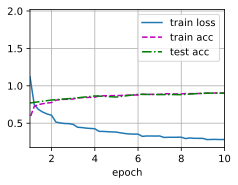

In [24]:
import time
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
lr, num_epochs = 0.15, 10
start = time.time()
d2l.train_ch6(net3, train_iter, test_iter, num_epochs, lr, 'mps')
end = time.time()
tm = end - start
if 60<tm <3600:
    min = int(tm / 60)
    print(f'time={min} m')
else:
    hour = int(tm / 3600)
    min = int((tm - hour*3600)/60)
    print(f'time={hour} h, {min} m')

loss 0.291, train acc 0.893, test acc 0.890
236.6 examples/sec on mps
time=50 m


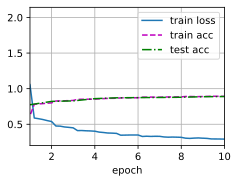

In [11]:
lr, num_epochs = 0.01, 10
start = time.time()
d2l.train_ch6(net2, train_iter, test_iter, num_epochs, lr, 'mps')
end = time.time()
time = end - start
if 60<time <3600:
    min = int(time / 60)
    print(f'time={min} m')
else:
    hour = int(time / 3600)
    min = int((time - hour*3600)/60)
    print(f'time={hour} h, {min} m')

In [8]:
# 现在AlexNet可以开始被训练了。与LeNet相比，这里的主要变化是使用更小的学习速率训练，这是因为网络更深更广、图像分辨率更高
# ，训练卷积神经网络就更昂贵

loss 0.326, train acc 0.880, test acc 0.881
205.2 examples/sec on mps
time=57 m


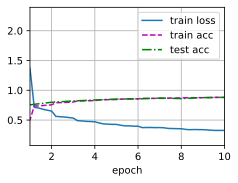

In [10]:
lr, num_epochs = 0.01, 10
start = time.time()
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, 'mps')
end = time.time()
time = end - start
if 60<time <3600:
    min = int(time / 60)
    print(f'time={min} m')
else:
    hour = int(time / 3600)
    min = int((time - hour*3600)/60)
    print(f'time={hour} h, {min} m')

In [1]:
import torch